## Data Wrangling

In [ ]:
import glob
import zipfile
import pandas as pd

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
https://www.lyft.com/bikes/bay-wheels/system-data

The Data
Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [30]:
# Make a list containing all the zip-file names
zip_list = glob.glob('./data/*.zip')
zip_list                          

['./data\\2017-fordgobike-tripdata.csv.zip',
 './data\\201801-fordgobike-tripdata.csv.zip',
 './data\\201802-fordgobike-tripdata.csv.zip',
 './data\\201803-fordgobike-tripdata.csv.zip',
 './data\\201804-fordgobike-tripdata.csv.zip',
 './data\\201805-fordgobike-tripdata.csv.zip',
 './data\\201806-fordgobike-tripdata.csv.zip',
 './data\\201807-fordgobike-tripdata.csv.zip',
 './data\\201808-fordgobike-tripdata.csv.zip',
 './data\\201809-fordgobike-tripdata.csv.zip',
 './data\\201810-fordgobike-tripdata.csv.zip',
 './data\\201811-fordgobike-tripdata.csv.zip',
 './data\\201812-fordgobike-tripdata.csv.zip',
 './data\\201901-fordgobike-tripdata.csv.zip',
 './data\\201902-fordgobike-tripdata.csv.zip',
 './data\\201903-fordgobike-tripdata.csv.zip',
 './data\\201904-fordgobike-tripdata.csv.zip',
 './data\\201905-baywheels-tripdata.csv.zip',
 './data\\201906-baywheels-tripdata.csv.zip',
 './data\\201907-baywheels-tripdata.csv.zip',
 './data\\201908-baywheels-tripdata.csv.zip',
 './data\\201909-ba

In [31]:
# Extract all zipfile using zipfile library
for zip_file in zip_list:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall("./data/")

In [33]:
csv_list = glob.glob('./data/*.csv')
csv_list      

['./data\\2017-fordgobike-tripdata.csv',
 './data\\201801-fordgobike-tripdata.csv',
 './data\\201802-fordgobike-tripdata.csv',
 './data\\201803-fordgobike-tripdata.csv',
 './data\\201804-fordgobike-tripdata.csv',
 './data\\201805-fordgobike-tripdata.csv',
 './data\\201806-fordgobike-tripdata.csv',
 './data\\201807-fordgobike-tripdata.csv',
 './data\\201808-fordgobike-tripdata.csv',
 './data\\201809-fordgobike-tripdata.csv',
 './data\\201810-fordgobike-tripdata.csv',
 './data\\201811-fordgobike-tripdata.csv',
 './data\\201812-fordgobike-tripdata.csv',
 './data\\201901-fordgobike-tripdata.csv',
 './data\\201902-fordgobike-tripdata.csv',
 './data\\201903-fordgobike-tripdata.csv',
 './data\\201904-fordgobike-tripdata.csv',
 './data\\201905-baywheels-tripdata.csv',
 './data\\201906-baywheels-tripdata.csv',
 './data\\201907-baywheels-tripdata.csv',
 './data\\201908-baywheels-tripdata.csv',
 './data\\201909-baywheels-tripdata.csv',
 './data\\201910-baywheels-tripdata.csv',
 './data\\201911-ba

In [14]:
df_2017 = pd.read_csv('2017-fordgobike-tripdata.csv')
df_2017

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber


In [21]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


array([[<AxesSubplot:title={'center':'duration_sec'}>,
        <AxesSubplot:title={'center':'start_station_id'}>,
        <AxesSubplot:title={'center':'start_station_latitude'}>],
       [<AxesSubplot:title={'center':'start_station_longitude'}>,
        <AxesSubplot:title={'center':'end_station_id'}>,
        <AxesSubplot:title={'center':'end_station_latitude'}>],
       [<AxesSubplot:title={'center':'end_station_longitude'}>,
        <AxesSubplot:title={'center':'bike_id'}>, <AxesSubplot:>]],
      dtype=object)

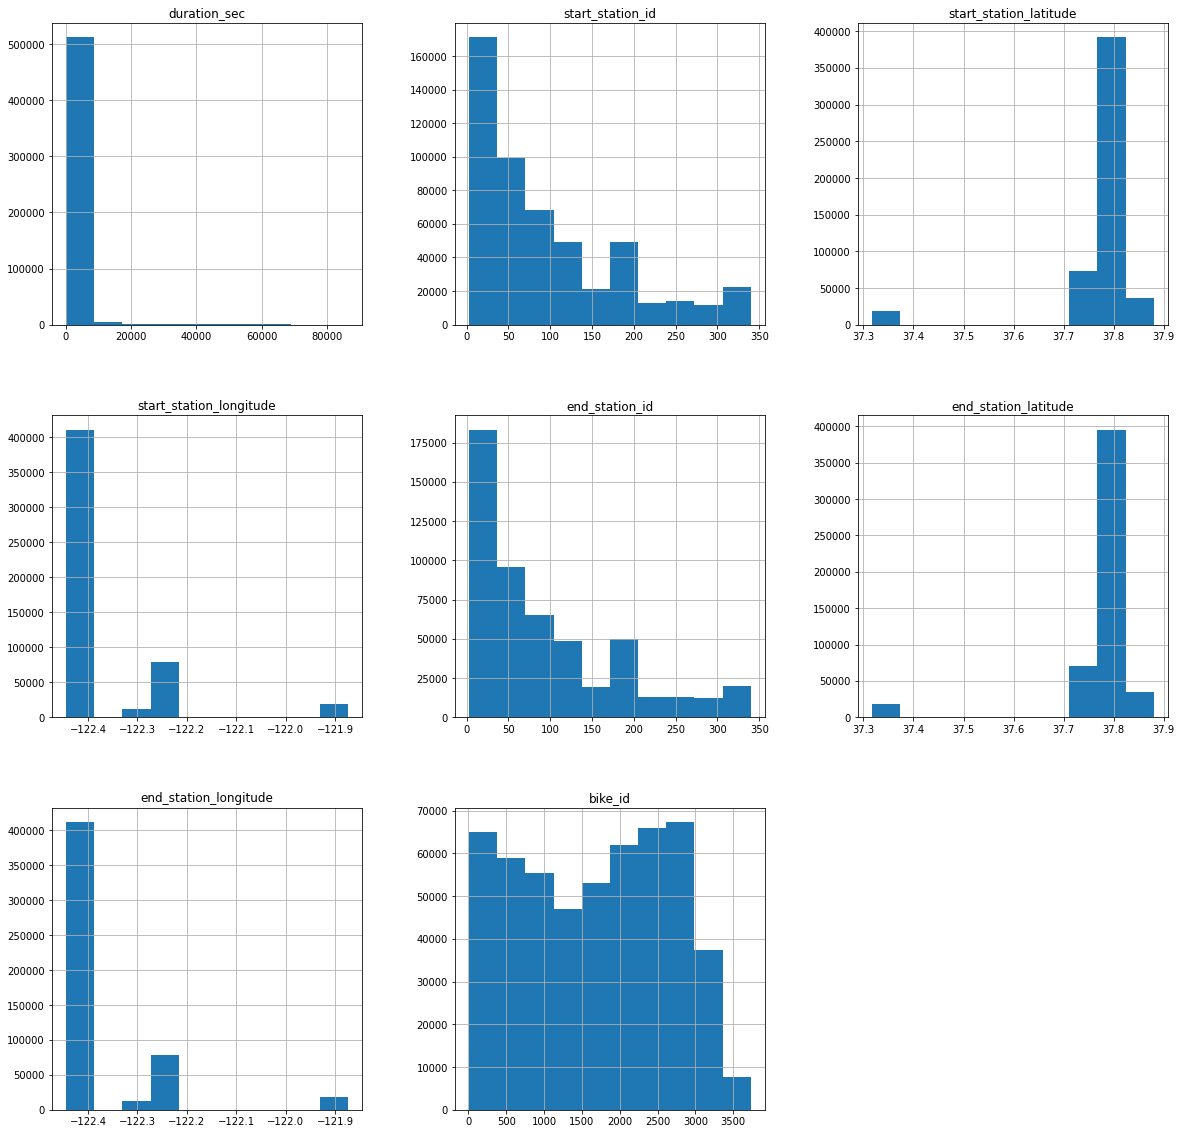

In [19]:
df_2017.hist(figsize=(20,20))